<h1 style='text-align: center; color: red;'>Customer Segmentation</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<h2  style='text-align: center; color: red;'>Data Understanding</h2>

In [2]:
df = pd.read_csv('customers.csv')

df.shape

(10695, 10)

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 835.7+ KB


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


<h2  style='text-align: center; color: red;'>Data Preparation</h2>

### Missing Values

In [6]:
df.Var_1.value_counts()

Var_1
Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: count, dtype: int64

In [7]:
df.Profession.value_counts()

Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64

In [8]:
df.drop(df.index[df.Profession.isnull()], inplace=True)
df.drop(df.index[df.Var_1.isnull()], inplace=True)

df.shape

(10428, 10)

- the samples that has null values in 'Profession' and 'Var_1' columns was dropped, as they're more specific columns.

- almost 200 samples was deleted.

for the 'Graduation', 'Work_Experience' and 'Ever_Married' columns, we'll impute values according with the customer's age.

In [9]:
# 'Ever_Married' column

for row in df.iterrows():
    if pd.isna(row[1]['Ever_Married']):
        
        age = row[1]['Age']
        id_ = row[1]['ID']
        
        value = df.loc[df.Age == age, 'Ever_Married'].value_counts().index[0]
        df.loc[df.ID == id_, 'Ever_Married'] = value

In [10]:
# 'Graduated' column

for row in df.iterrows():
    if pd.isna(row[1]['Graduated']):
        
        age = row[1]['Age']
        id_ = row[1]['ID']
        
        value = df.loc[df.Age == age, 'Graduated'].value_counts().index[0]
        df.loc[df.ID == id_, 'Graduated'] = value

In [11]:
# 'Work_Experience' column

for row in df.iterrows():
    if pd.isna(row[1]['Work_Experience']):
        
        age = row[1]['Age']
        id_ = row[1]['ID']
        
        value = df.loc[df.Age == age, 'Work_Experience'].value_counts().index[0]
        df.loc[df.ID == id_, 'Work_Experience'] = value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10428 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10428 non-null  int64  
 1   Gender           10428 non-null  object 
 2   Ever_Married     10428 non-null  object 
 3   Age              10428 non-null  int64  
 4   Graduated        10428 non-null  object 
 5   Profession       10428 non-null  object 
 6   Work_Experience  10428 non-null  float64
 7   Spending_Score   10428 non-null  object 
 8   Family_Size      10013 non-null  float64
 9   Var_1            10428 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 896.2+ KB


imputing the median to the null values in the 'Family_Size' column.

In [13]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df.Family_Size.values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [14]:
df['Family_Size'] = imputer.transform(df.Family_Size.values.reshape(-1, 1))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10428 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10428 non-null  int64  
 1   Gender           10428 non-null  object 
 2   Ever_Married     10428 non-null  object 
 3   Age              10428 non-null  int64  
 4   Graduated        10428 non-null  object 
 5   Profession       10428 non-null  object 
 6   Work_Experience  10428 non-null  float64
 7   Spending_Score   10428 non-null  object 
 8   Family_Size      10428 non-null  float64
 9   Var_1            10428 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 896.2+ KB


In [16]:
df_copy = df.copy()

### Encoding

In [17]:
onehot = OneHotEncoder(drop='if_binary', sparse_output=False)

assigning one hot enconding to the binary catecorical variables.

In [18]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


In [19]:
df['Gender'] = onehot.fit_transform(df.Gender.values.reshape(-1, 1))
df['Ever_Married'] = onehot.fit_transform(df.Ever_Married.values.reshape(-1, 1))
df['Graduated'] = onehot.fit_transform(df.Graduated.values.reshape(-1, 1))

assigning numeric ordinal values to the 'Spending_Score' and 'Segmentation' columns.

In [20]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1.0,0.0,22,0.0,Healthcare,1.0,Low,4.0,Cat_4
1,462643,0.0,1.0,38,1.0,Engineer,0.0,Average,3.0,Cat_4
2,466315,0.0,1.0,67,1.0,Engineer,1.0,Low,1.0,Cat_6
3,461735,1.0,1.0,67,1.0,Lawyer,0.0,High,2.0,Cat_6
4,462669,0.0,1.0,40,1.0,Entertainment,1.0,High,6.0,Cat_6


In [21]:
ord_Spending = OrdinalEncoder(categories=[['Low', 'Average', 'High']])

In [22]:
df['Spending_Score'] = ord_Spending.fit_transform(df.Spending_Score.values.reshape(-1, 1))

spliting 'Profession' and 'Var_1' columns into single columns for each value.

In [23]:
df = pd.get_dummies(df, dtype='float64')

### Normalization

In [24]:
df.drop('ID', axis=1, inplace=True)

In [25]:
minmax = MinMaxScaler()

In [26]:
df[df.columns] = minmax.fit_transform(df)

In [27]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1.0,0.0,0.056338,0.0,0.071429,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.281690,1.0,0.000000,0.5,0.250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.690141,1.0,0.071429,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.690141,1.0,0.000000,1.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.309859,1.0,0.071429,1.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h2  style='text-align: center; color: red;'>Modeling</h2>

In [28]:
pca = PCA(2)

pca_data = pca.fit_transform(df)

In [29]:
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

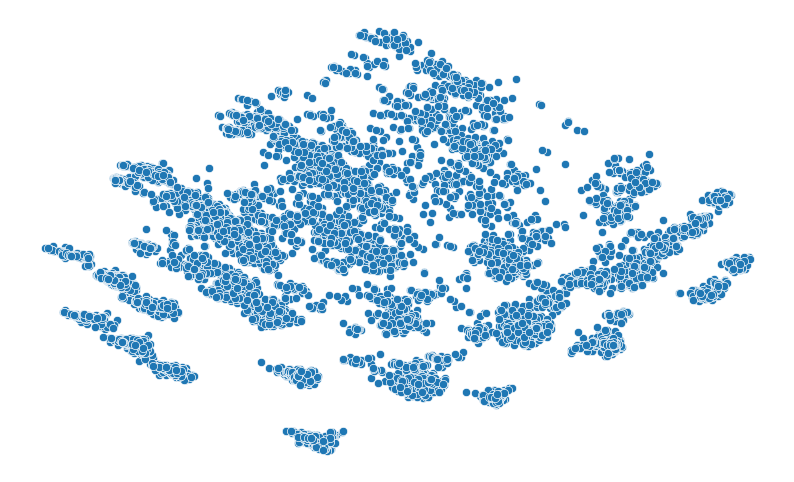

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', ax=ax)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

plt.show()

### Elbow Method

In [31]:
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

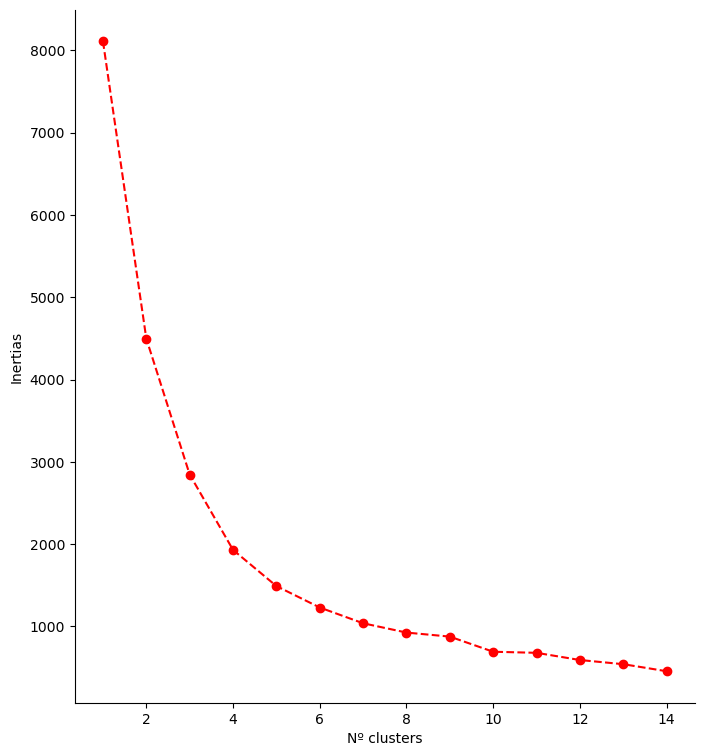

In [32]:
fig, ax = plt.subplots(figsize=(8, 9))

ax.plot(range(1, 15), inertias, 'r--', marker='o', label='Inertias')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Nº clusters', fontsize=10)
ax.set_ylabel('Inertias', fontsize=10)

plt.show()

In [33]:
n_clusters = 4

### KMeans

In [34]:
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(pca_data)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [35]:
labels = kmeans.labels_

In [36]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

labels_mapping = [mapping[val] for val in labels]

In [37]:
df_copy['Clusters'] = labels_mapping

In [38]:
pca_df['Clusters'] = labels_mapping

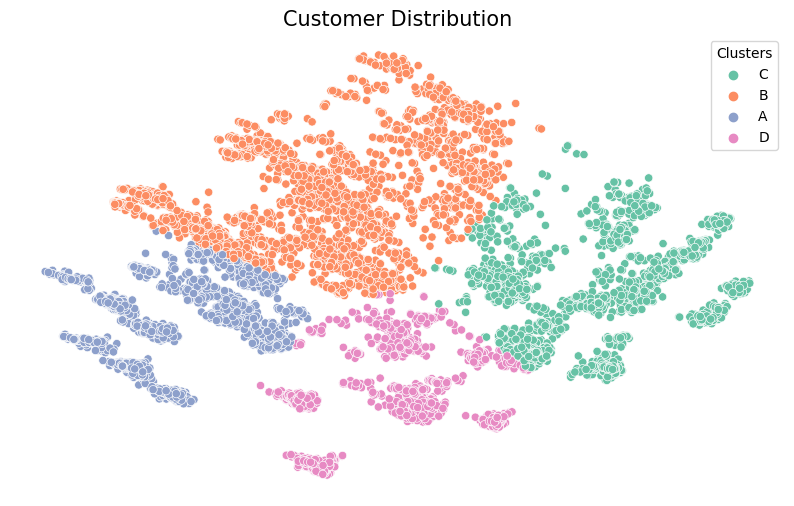

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Clusters', ax=ax, palette='Set2')

ax.set_title('Customer Distribution', fontsize=15)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

plt.savefig('customer_distribution.png')

now let's look at the criteria for each class our model separated data from.

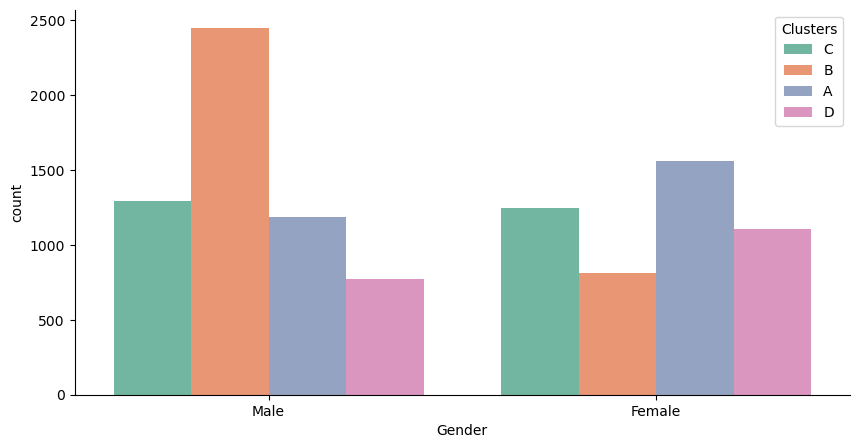

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df_copy, x='Gender', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

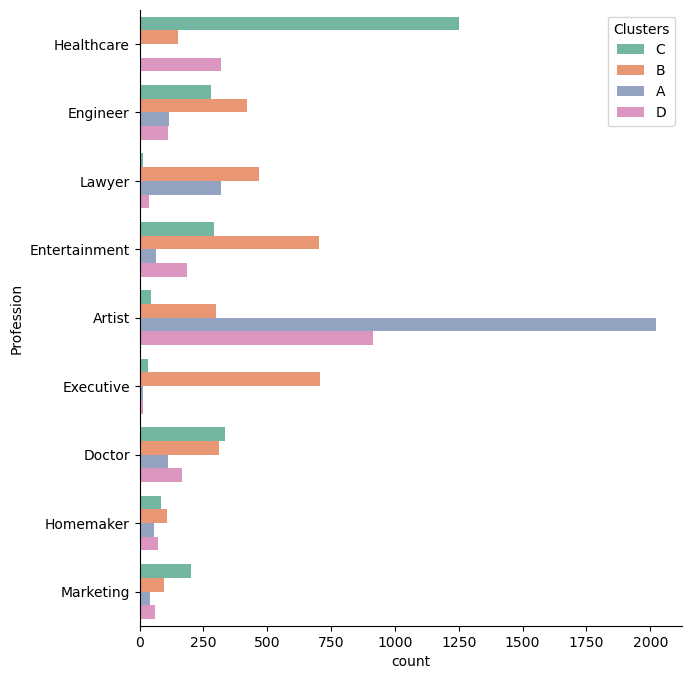

In [41]:
fig, ax = plt.subplots(figsize=(7, 8))

sns.countplot(df_copy, y='Profession', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

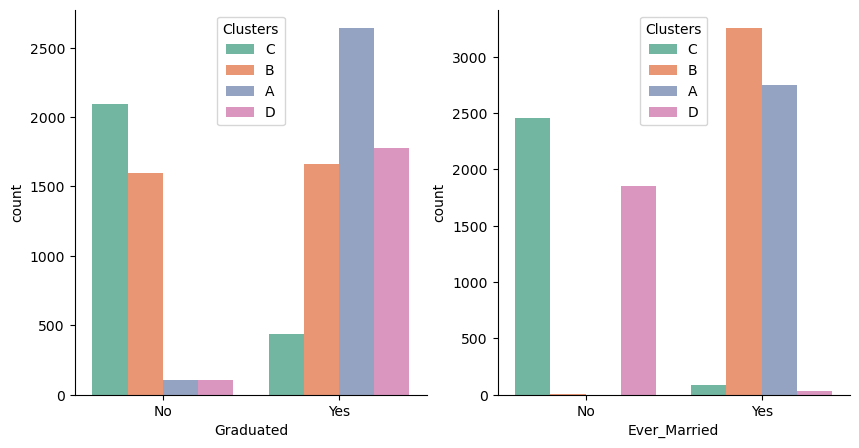

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(df_copy, x='Graduated', hue='Clusters', palette='Set2', ax=ax[0])
sns.countplot(df_copy, x='Ever_Married', hue='Clusters', palette='Set2', ax=ax[1])

ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

plt.show()

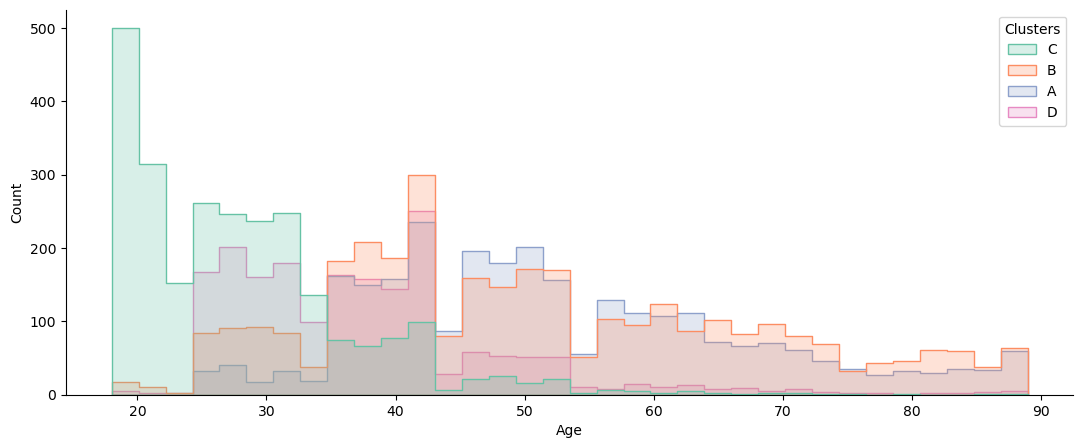

In [43]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.histplot(df_copy, x="Age", hue="Clusters", element="step", palette='Set2')

    
ax.spines[['top', 'right']].set_visible(False)

plt.show()

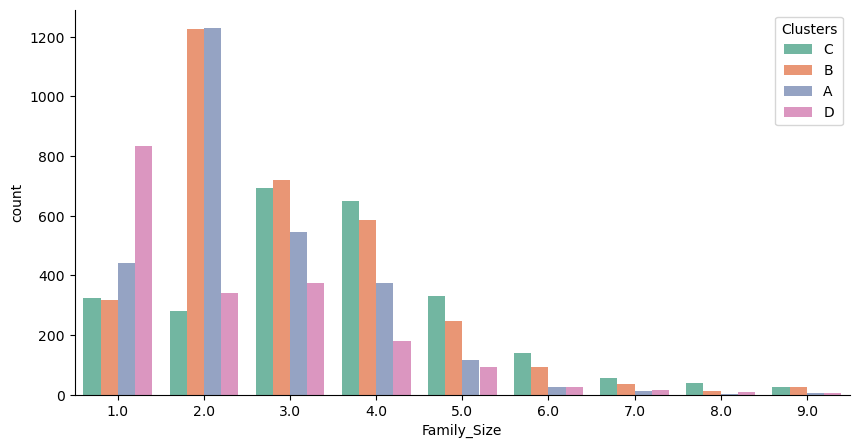

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df_copy, x='Family_Size', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

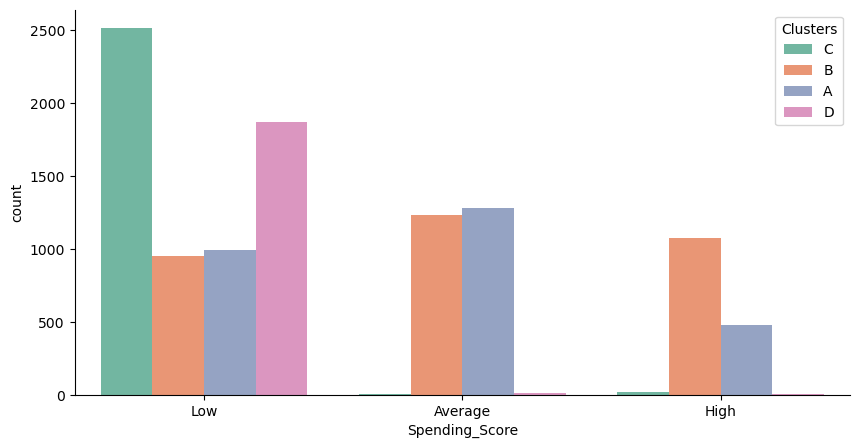

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df_copy, x='Spending_Score', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

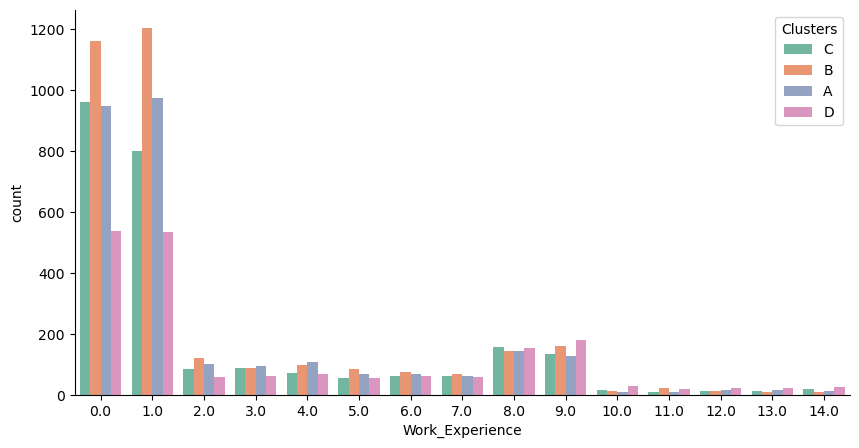

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df_copy, x='Work_Experience', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

<h3 style='color: blue;'>Cluster A</h3>
<ul>
   <li><p style='color: #39a9cc; font-size: 14px'>Predominantly composed of artists.</p></li>
   <li><p style='color: #39a9cc; font-size: 14px'><strong>Essentially, all clients in this group have been married at least once and are graduates.</strong></p></li>
</ul>

<h3 style='color: orange;'>Cluster B</h3>
<ul>
   <li><p style='color: #f5634a; font-size: 14px'>Primarily composed of individuals who have been married at least once.</p></li>
   <li><p style='color: #f5634a; font-size: 14px'>Generally comprised of older individuals.</p></li>
   <li><p style='color: #f5634a; font-size: 14px'>Significant balance in other variables, such as expenditure levels, family size, years of experience, diverse professions, etc.</p></li>
</ul>

<h3 style='color: green;'>Cluster C</h3>
<ul>
   <li><p style='color: #4cbe73; font-size: 14px'>No other cluster is composed of more healthcare professionals than Cluster C.</p></li>
   <li><p style='color: #4cbe73; font-size: 14px'>Typically comprised of individuals who have never been married and are not graduates.</p></li>
   <li><p style='color: #4cbe73; font-size: 14px'>Generally, younger individuals are part of this group.</li>
   <li><p style='color: #4cbe73; font-size: 14px'><strong>Primarily composed of individuals with a low level of company expenditures.</strong></p></li>
</ul>

<h3 style='color: purple;'>Cluster D</h3>
<ul>
   <li><p style='color: #e50ea2; font-size: 14px'>Predominantly composed of individuals with low expenditures.</p></li>
   <li><p style='color: #e50ea2; font-size: 14px'>Individuals who have never been married.</p></li>
   <li><p style='color: #e50ea2; font-size: 14px'>Individuals who are graduates.</p></li>
   <li><p style='color: #e50ea2; font-size: 14px'>A high proportion of artists.</p></li>
</ul>